In [1]:
#Conhecendo a situação climática dos Brics


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_squared_error
from math import sqrt


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
emissoes_regiao = pd.read_csv("/content/drive/My Drive/annual-co-emissions-by-region.csv")
emissoes_gdp = pd.read_csv("/content/drive/My Drive/co2-emissions-and-gdp.csv")
climate_change = emissoes_gdp = pd.read_csv("/content/drive/My Drive/climate-change.csv")

In [6]:
emissoes_regiao

,Entity,Code,Year,Annual CO2 emissions (zero filled)
0,Afghanistan,AFG,1750,0
1,Afghanistan,AFG,1751,0
2,Afghanistan,AFG,1752,0
3,Afghanistan,AFG,1753,0
4,Afghanistan,AFG,1754,0
...,...,...,...,...
66932,Zimbabwe,ZWE,2016,10737567
66933,Zimbabwe,ZWE,2017,9581633
66934,Zimbabwe,ZWE,2018,11854367
66935,Zimbabwe,ZWE,2019,10949084


In [7]:
emissoes_gdp

,Entity,Year,CO2 concentrations,CH4 concentrations,N2O concentrations,February,September,Mass U.S. glaciers,CSIRO,IAP,MRIJMA,NOAA,Snow cover,Sea surface temp,Sea surface temp (lower-bound),Sea surface temp (upper-bound),IAP.1,NOAA.1,MRIJMA.1,Arctic sea ice
0,Antarctica,1979,NaN,NaN,NaN,1.212361,7.027059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Antarctica,1980,NaN,NaN,NaN,1.088808,7.266443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Antarctica,1981,NaN,NaN,NaN,1.108113,7.181500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Antarctica,1982,NaN,NaN,NaN,1.208500,7.084975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Antarctica,1983,NaN,NaN,NaN,1.185334,7.177639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,World,2018,408.522500,1857.425000,330.925000,NaN,NaN,NaN,NaN,17.630567,16.642667,16.485767,NaN,0.61641,0.59350,0.63888,25.426967,22.427733,26.827333,4.79
2772,World,2019,411.419167,1866.675000,331.875000,NaN,NaN,NaN,NaN,18.933567,17.872667,17.489767,NaN,0.71702,0.69317,0.73946,27.445967,NaN,28.777333,4.36
2773,World,2020,413.943333,1879.283333,333.033333,NaN,NaN,NaN,NaN,20.007567,18.082667,17.287767,NaN,0.70991,0.68467,0.73446,29.420967,NaN,29.277333,4.00
2774,World,2021,416.107500,1895.791667,334.325000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63219,0.60608,0.65442,NaN,NaN,NaN,4.92


In [8]:
climate_change 

,Entity,Year,CO2 concentrations,CH4 concentrations,N2O concentrations,February,September,Mass U.S. glaciers,CSIRO,IAP,MRIJMA,NOAA,Snow cover,Sea surface temp,Sea surface temp (lower-bound),Sea surface temp (upper-bound),IAP.1,NOAA.1,MRIJMA.1,Arctic sea ice
0,Antarctica,1979,NaN,NaN,NaN,1.212361,7.027059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Antarctica,1980,NaN,NaN,NaN,1.088808,7.266443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Antarctica,1981,NaN,NaN,NaN,1.108113,7.181500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Antarctica,1982,NaN,NaN,NaN,1.208500,7.084975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Antarctica,1983,NaN,NaN,NaN,1.185334,7.177639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,World,2018,408.522500,1857.425000,330.925000,NaN,NaN,NaN,NaN,17.630567,16.642667,16.485767,NaN,0.61641,0.59350,0.63888,25.426967,22.427733,26.827333,4.79
2772,World,2019,411.419167,1866.675000,331.875000,NaN,NaN,NaN,NaN,18.933567,17.872667,17.489767,NaN,0.71702,0.69317,0.73946,27.445967,NaN,28.777333,4.36
2773,World,2020,413.943333,1879.283333,333.033333,NaN,NaN,NaN,NaN,20.007567,18.082667,17.287767,NaN,0.70991,0.68467,0.73446,29.420967,NaN,29.277333,4.00
2774,World,2021,416.107500,1895.791667,334.325000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63219,0.60608,0.65442,NaN,NaN,NaN,4.92


In [9]:
df = emissoes_regiao.set_index('Year')

In [10]:
df

,Entity,Code,Annual CO2 emissions (zero filled)
Year,,,
1750,Afghanistan,AFG,0
1751,Afghanistan,AFG,0
1752,Afghanistan,AFG,0
1753,Afghanistan,AFG,0
1754,Afghanistan,AFG,0
...,...,...,...
2016,Zimbabwe,ZWE,10737567
2017,Zimbabwe,ZWE,9581633
2018,Zimbabwe,ZWE,11854367


In [11]:
Bra = df.loc[df['Entity'] == 'Brazil']
Russ = df.loc[df['Entity'] == 'Russia'] 
Ind = df.loc[df['Entity'] == 'India']
Chin = df.loc[df['Entity'] == 'China']
Africa = df.loc[df['Entity'] == 'South Africa']

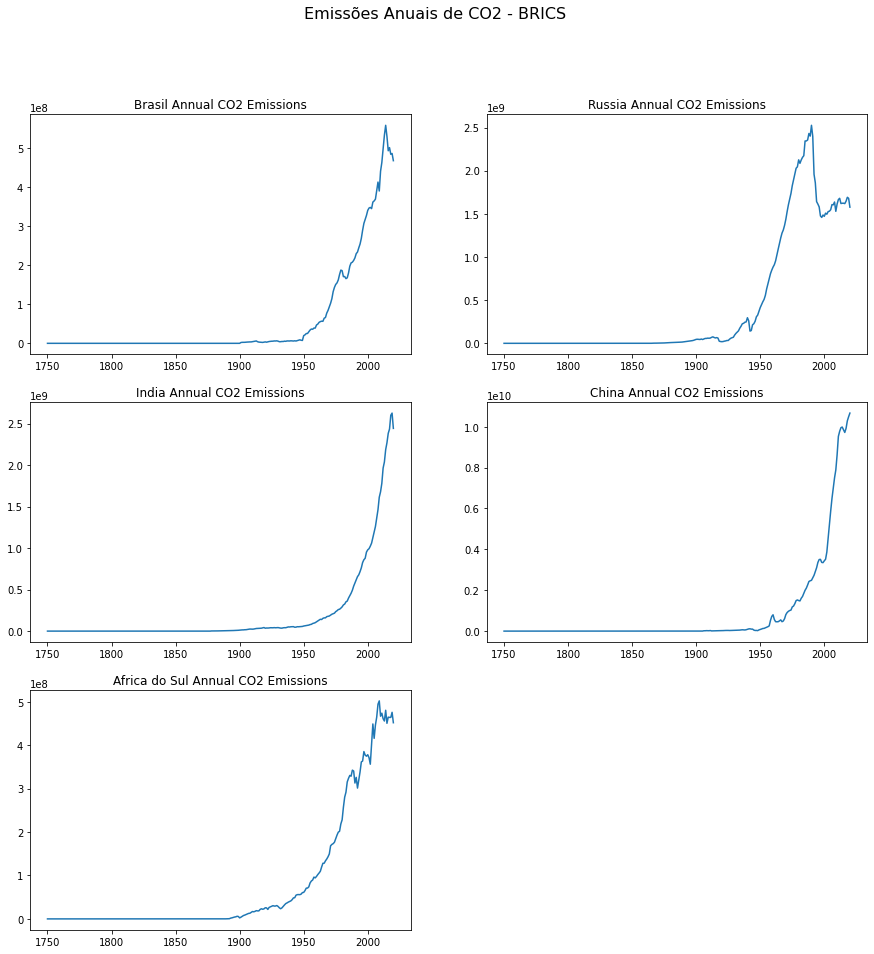

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Emissões Anuais de CO2 - BRICS', fontsize=16)
axs[0,0].plot(Bra['Annual CO2 emissions (zero filled)'])
axs[0,0].title.set_text('Brasil Annual CO2 Emissions')
axs[0,1].plot(Russ['Annual CO2 emissions (zero filled)'])
axs[0,1].title.set_text('Russia Annual CO2 Emissions')
axs[1,0].plot(Ind['Annual CO2 emissions (zero filled)'])
axs[1,0].title.set_text('India Annual CO2 Emissions')
axs[1,1].plot(Chin['Annual CO2 emissions (zero filled)'])
axs[1,1].title.set_text('China Annual CO2 Emissions')
axs[2,0].plot(Africa['Annual CO2 emissions (zero filled)'])
axs[2,0].title.set_text('Africa do Sul Annual CO2 Emissions')
fig.delaxes(axs[2,1])